In [1]:
! pip install langchain_community tiktoken langchain-openai langchainhub chromadb langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.0/113.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = langchain_key
os.environ['OPENAI_API_KEY'] = openai_key

In [5]:
import bs4
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

Load Documents from the web


In [6]:
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

In [7]:
docs

[Document(page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final re

Splitter

In [8]:
text_splitter= RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=200)

In [9]:
splits = text_splitter.split_documents(docs)

In [10]:
len(splits)

84

In [11]:
splits[1]

Document(page_content='Planning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consider all the in-context learning (See Prompt Engineering) as utilizing short-term memory of the model to learn.\nLong-term memory: This provides the agent with the capability to retain and recall (infinite) information over extended periods, often by leveraging an external vector store and fast retrieval.\n\n\nTool use', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'})

Embed and Store into a Chroma DB Vector Store

In [16]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

In [17]:
vector_store = Chroma.from_documents(documents=splits, embedding=HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
))

In [53]:
vector_store.persist()

In [18]:
retriever = vector_store.as_retriever()

In [20]:
retriever.get_relevant_documents("tell me about challenges", k=4)

[Document(page_content='}\n]\nChallenges#\nAfter going through key ideas and demos of building LLM-centered agents, I start to see a couple common limitations:', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}),
 Document(page_content='Here are a sample conversation for task clarification sent to OpenAI ChatCompletion endpoint used by GPT-Engineer. The user inputs are wrapped in {{user input text}}.\n[\n  {\n    "role": "system",\n    "content": "You will read instructions and not carry them out, only seek to clarify them.\\nSpecifically you will first summarise a list of super short bullets of areas that need clarification.\\nThen you will pick one clarifying question, and wait for an answer from the user.\\n"\n  },\n  {\n    "role": "user",\n    "content": "We are writing {{a Super Mario game in python. MVC components split in separate files. Keyboard control.}}\\n"\n  },\n  {\n    "role": "assistant",', metadata={'source': 'https://lilianweng.github.io/po

Prompt pull from existing langchainhub

In [21]:
prompt = hub.pull('rlm/rag-prompt')

In [22]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

LLM import

In [18]:
!pip install ollama

In [28]:
! ollama pull 'llama2'

/bin/bash: line 1: ollama: command not found


In [21]:
llm_model='llama2:chat'

In [23]:
from langchain_community.chat_models import ChatOllama
llm= ChatOllama(model = llm_model, temperature=0.1)

GPT-3.5 llm

In [23]:
# LLM
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

In [24]:

# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Question
rag_chain.invoke("What are the challenges")

'The challenges in building LLM-centered agents include difficulties in long-term planning and task decomposition, as well as reliability issues with the natural language interface. LLMs struggle to adjust plans and may exhibit rebellious behavior, impacting their robustness and output reliability. These challenges highlight the need for improvements in planning capabilities and natural language processing for better agent performance.'

# QUERY TRANSLATION:
## 1) Multi Query Approach: Breaking down question to multiple questions for better retreieval

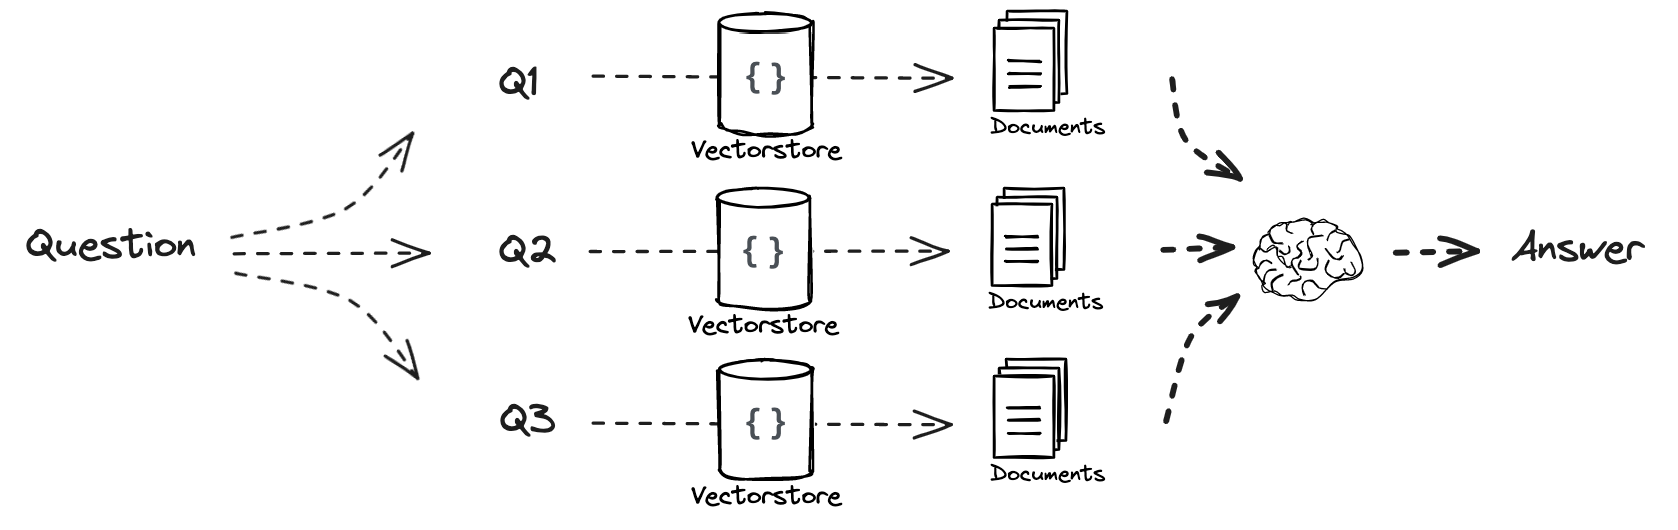

### We basically ask the LLM through prompting to breakdown the given query into multiple questions and then apply RAG for each of them to generate multiple contexts while answering

Multi Query Prompt

In [25]:
llm = ChatOpenAI(model = 'gpt-3.5-turbo', temperature=0.1)

In [26]:
from langchain.prompts import ChatPromptTemplate

template = """You are an AI language model assistant. Your task is to generate three
different versions of the given user question to retrieve relevant documents from a vector
database. By generating multiple perspectives on the user question, your goal is to help
the user overcome some of the limitations of the distance-based similarity search.
Provide these alternative questions separated by newlines. Original question: {question}"""
prompt_perspectives = ChatPromptTemplate.from_template(template)

from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

generate_queries = (
    prompt_perspectives
    | llm
    | StrOutputParser()
    | (lambda x: x.split("\n"))
)


In [27]:
question ='What are the challenges of this approach'
generate_queries.invoke({"question":question})

['1. What obstacles does this method face?',
 '2. What difficulties are associated with this strategy?',
 '3. What are the potential drawbacks of pursuing this approach?']

### Chain for multiple queries and retrieving multiple docs for each query

In [28]:
from langchain.load import dumps, loads

def get_unique_union(documents: list[list]):
    """ Unique union of retrieved docs """
    # Flatten list of lists, and convert each Document to string
    flattened_docs = [dumps(doc) for sublist in documents for doc in sublist]
    # Get unique documents
    unique_docs = list(set(flattened_docs))
    # Return
    return [loads(doc) for doc in unique_docs]

# Retrieve
question = "What is task decomposition for LLM agents?"
retrieval_chain = generate_queries | retriever.map() | get_unique_union
docs = retrieval_chain.invoke({"question":question})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


### Trying to compare the retrieved docs both from usual query and the multiquery

In [29]:
docs

[Document(page_content='Or\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}),
 Document(page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many 

In [30]:
multiquery_results=docs

In [31]:
query_results=retriever.get_relevant_documents(question)

In [32]:
common_items = [doc1 for doc1 in query_results for doc2 in multiquery_results if doc1 == doc2]

# Number of similar items
number_of_similar_items = len(common_items)
print(f"Number of similar items: {number_of_similar_items}")

Number of similar items: 4


Generation after RAG

In [33]:
prompt=hub.pull('rlm/rag-prompt')

In [34]:
prompt

ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

In [35]:
from operator import itemgetter
multiquery_rag = ({
    "context": retrieval_chain,
    "question": itemgetter("question")
}
    | prompt
    | llm
    | StrOutputParser()
)

In [36]:
multiquery_rag.invoke({'question':question})

"Task decomposition for LLM agents involves breaking down complex tasks into smaller, more manageable steps using techniques like Chain of Thought (CoT). This approach allows the model to utilize more computation to handle difficult tasks effectively. By transforming big tasks into multiple manageable tasks, task decomposition sheds light on the model's thinking process."

# RAG Fusion Technique for solving queries into multiquery and then using a RANKING function to rank all the documents as per priority

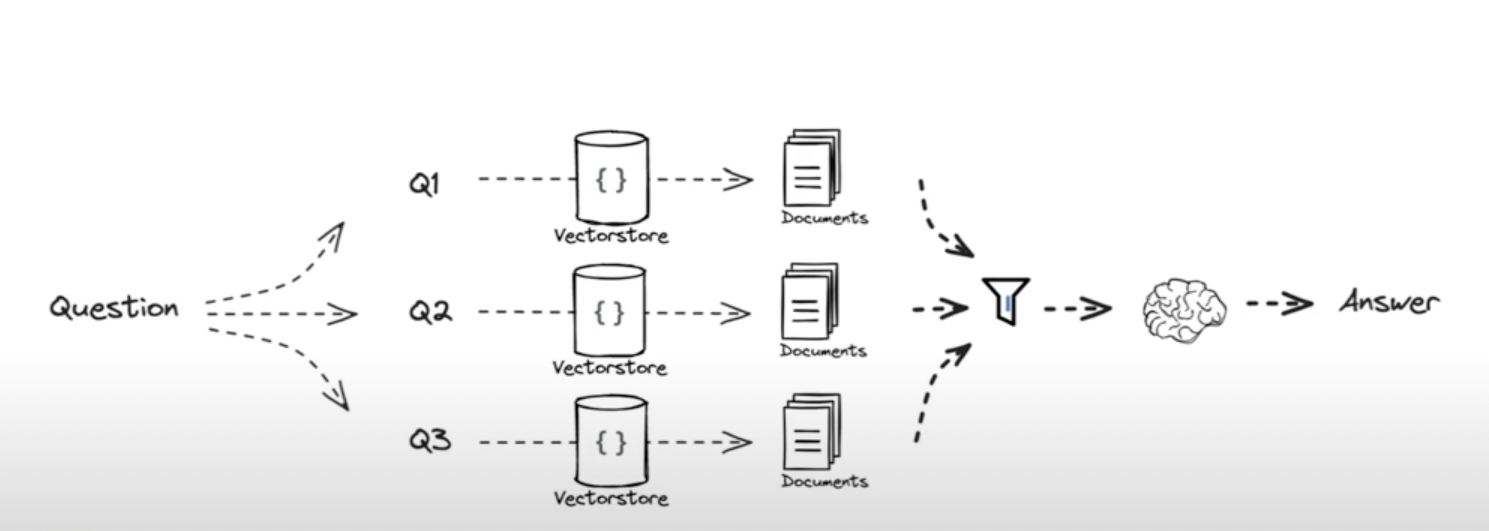

### Multiquery method and the retrieval docs chain remains the same as above, we now need to define a reciprocal rank fucnction for better ranked documents.

The Reciprocal Rank Fusion (RRF) method in information retrieval combines multiple ranked lists by assigning each document a score based on the reciprocal of its rank position plus a constant \( k \). This method effectively merges different search results by weighting higher-ranked documents more heavily, thus promoting documents that appear early in multiple lists.

In [43]:
def rrf(docs):
  fused_scores={}
  k=60
  for d in range(0,len(docs)):
    str_docs=dumps(docs[d])
    if str_docs not in fused_scores.keys():
     fused_scores[str_docs] = 1/(k+d)
  return fused_scores


#### Implementation of the RRF function:

The provided Python function `reciprocal_rank_fusion` implements the Reciprocal Rank Fusion (RRF) method for combining ranked lists of documents from multiple sources. This technique is often used in information retrieval to merge results from different search algorithms into a single, more reliable ranking.

Here's a breakdown of how the function works:

1. **Initialization**: A dictionary `fused_scores` is created to store cumulative scores for each unique document across all input lists.

2. **Processing Each List**: The function iterates over each ranked list of documents provided in the `results` parameter. For every document in each list:
   - The document is converted into a string format (using `dumps`, which likely implies conversion to JSON) to serve as a key for the dictionary. This ensures that the same document across different lists is recognized as identical.
   - The function checks if the document is already in the `fused_scores` dictionary and initializes its score if it's not present.
   - The document's score is then updated using the RRF formula: 1/(rank+k), where `rank` is the position of the document in the list (zero-indexed), and `k` is a constant that can be adjusted (defaulting to 60). This formula gives higher weight to documents that appear earlier in the lists.

    - document scores are  then added up as we encounter it again in the list. So this becomes an additive rank rather than fixed rank

3. **Sorting and Output**: Once all lists have been processed and scores updated, the documents are sorted by their scores in descending order. The sorted list of documents, along with their scores, is then returned as a list of tuples.

This method is effective for aggregating search results because it balances the contributions of each rank position across different systems, giving a fair combined score that helps in identifying universally relevant documents.

In [55]:
from langchain.load import dumps, loads

def reciprocal_rank_fusion(results: list[list], k=60):
    """ Reciprocal_rank_fusion that takes multiple lists of ranked documents
        and an optional parameter k used in the RRF formula """

    # Initialize a dictionary to hold fused scores for each unique document
    fused_scores = {}

    # Iterate through each list of ranked documents
    for docs in results:
        # Iterate through each document in the list, with its rank (position in the list)
        for rank, doc in enumerate(docs):
            # Convert the document to a string format to use as a key (assumes documents can be serialized to JSON)
            doc_str = dumps(doc)
            # If the document is not yet in the fused_scores dictionary, add it with an initial score of 0
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0
            # Retrieve the current score of the document, if any
            previous_score = fused_scores[doc_str]
            # Update the score of the document using the RRF formula: 1 / (rank + k)
            fused_scores[doc_str] += 1 / (rank + k)

    # Sort the documents based on their fused scores in descending order to get the final reranked results
    reranked_results = [
        (loads(doc), score)
        for doc, score in sorted(fused_scores.items(), key=lambda x: x[1], reverse=True)
    ]

    # Return the reranked results as a list of tuples, each containing the document and its fused score
    return reranked_results

In [46]:
reciprocal_rank_fusion(docs)

[(['metadata',
   {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}],
  0.09836065573770493),
 (['type', 'Document'], 0.0967741935483871),
 (['page_content',
   'Or\n@article{weng2023agent,\n  title   = "LLM-powered Autonomous Agents",\n  author  = "Weng, Lilian",\n  journal = "lilianweng.github.io",\n  year    = "2023",\n  month   = "Jun",\n  url     = "https://lilianweng.github.io/posts/2023-06-23-agent/"\n}\nReferences#\n[1] Wei et al. “Chain of thought prompting elicits reasoning in large language models.” NeurIPS 2022\n[2] Yao et al. “Tree of Thoughts: Dliberate Problem Solving with Large Language Models.” arXiv preprint arXiv:2305.10601 (2023).\n[3] Liu et al. “Chain of Hindsight Aligns Language Models with Feedback\n“ arXiv preprint arXiv:2302.02676 (2023).\n[4] Liu et al. “LLM+P: Empowering Large Language Models with Optimal Planning Proficiency” arXiv preprint arXiv:2304.11477 (2023).'],
  0.016666666666666666),
 (['page_content',
   'Fig. 1. Overview of a LLM

Retrieval Chain define

In [56]:
retrieval_rag_fusion = generate_queries | retriever.map() | reciprocal_rank_fusion
retrieval_rag_fusion.invoke({"question":question})

[(Document(page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}),
  0.05),
 (Document(page_content='Challenges in long-term planning and task decomposition: Planning over a lengthy history and effectively exploring the solution space remain challenging. LLMs struggle to adjust plans when faced with unexpected errors, making them less robust compare

In [59]:
template = """Answer the following question based on this context:

{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

Generation Chain

In [57]:
rag_fusion = (
  {"context": retrieval_rag_fusion,
   "question":itemgetter("question")}
  | prompt
  | llm
  | StrOutputParser()
)

In [60]:
rag_fusion.invoke({"question": question})

'Task decomposition for LLM agents involves breaking down complex tasks into smaller and simpler steps using the Chain of Thought (CoT) prompting technique. This approach enhances model performance by instructing the model to "think step by step" and transform big tasks into manageable ones. LLMs parse user requests into multiple tasks during the task planning stage, utilizing few-shot examples to guide the process.'